In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Colab\ Notebooks/Machine\ Learning/Lab\ 8\ -\ Random\ Forest\ +\ Clustering

/content/drive/MyDrive/Colab Notebooks/Machine Learning/Lab 8 - Random Forest + Clustering


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import random as rd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Cust_Segmentation.csv')
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [5]:
#Pre-Processing dataset
X = df.values[:,[5,6]]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [6]:
m=Clus_dataSet.shape[0] #number of training examples
n=Clus_dataSet.shape[1] #number of features. Here n=2
n_iter=500
K=5 #number of clusters

In [7]:
#Initialize the centroids randomly from the data points
Centroids=np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [8]:
Output={}

for i in range(n_iter):
  
  #For each training example compute the euclidian distance from the centroid and assign the cluster based on the minimal distance
  EuclidianDistance=np.array([]).reshape(m,0)
  for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
  C=np.argmin(EuclidianDistance,axis=1)+1

  #Grouping the data point as per assigned cluster
  Y={}
  for k in range(K):
      Y[k+1]=np.array([]).reshape(2,0)
  for i in range(m):
      Y[C[i]]=np.c_[Y[C[i]],X[i]]
      
  for k in range(K):
      Y[k+1]=Y[k+1].T

  #Calculating new centroid      
  for k in range(K):
      Centroids[:,k]=np.mean(Y[k+1],axis=0)

  Output = Y

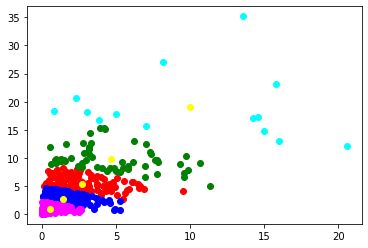

In [9]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
  plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],c='yellow')
plt.show()